# 프로젝트 설명
이번 프로젝트에서는 단어의 수에 따라서 M/L 모델의 성능이 어떻게 변하는지 테스트해보겠습니다.    
팀원들과 단어 수를 나눠서 실험하기로 했고 저는 단어장을 모두 사용하는 방법으로 테스트 해보았습니다.    
모델은 나이브 베이즈 분류기 , CNB, 로지스틱 회귀, 선형서포트 벡터를 사용하였습니다.    
`num_words`를 5000으로 했을 때 10,000으로 한것과 별로 차이가 없다고 생각되어 `num_words = 500`으로 한번 더 실험을 진행했습니다.    
결과적으로  

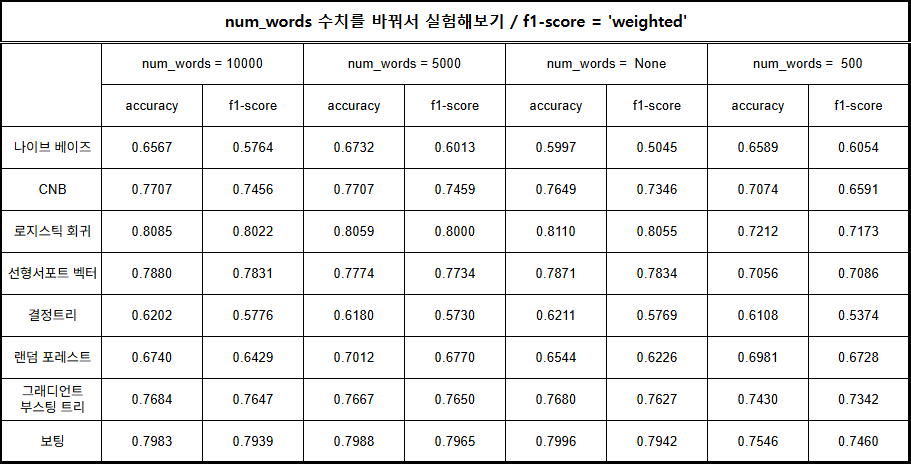

## 벡터화 방법별 ML/DL 성능 비교


In [1]:
# !pip install gensim

In [2]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# 훈련데이터와 테스트 데이터 로드하기
## 단어수 설정 : num_words = None

In [3]:
# 데이터를 훈련 데이터와 테스트 데이터로 나누어 변수에 각각 저장

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

In [4]:
# 데이터가 구성 출력해보기

print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [5]:
# word_index 저장
word_index = reuters.get_word_index(path="reuters_word_index.json")

In [6]:
# 실제 맵핑된 인덱스 값 찾기 (+3)
index_to_word = { index+3 : word for word, index in word_index.items() }

# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

In [7]:
# 전체 훈련용 뉴스 데이터와 전체 테스트용 뉴스 데이터를 텍스트 데이터로 변환

decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [8]:
decoded_test = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded_test.append(t)

x_test = decoded_test
print(len(x_test))

2246


# 벡터화 하기

In [9]:
# 임포트하기
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [10]:
# DTM을 생성
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)

In [11]:
# TF-IDF 생성하기
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)

In [23]:
tfidfv.shape

(8982, 26506)

In [ ]:
# 테스트 데이터에도 같은 전처리 해주기
x_test_dtm = dtmvector.transform(x_test)              # 테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) # DTM을 TF-IDF 행렬로 변환

# 나이브 베이즈 분류기 사용하기

In [12]:
# 라이브러리 불러오기
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산
from sklearn.metrics import f1_score       #f1_score 계산

In [13]:
# 나이브 베이즈 분류기는 사이킷런의 MultinomialNB()를 통해 사용할 수 있다.
model = MultinomialNB()
model.fit(tfidfv, y_train)

MultinomialNB()

In [14]:
x_test_dtm = dtmvector.transform(x_test)              # 테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) # DTM을 TF-IDF 행렬로 변환

predicted = model.predict(tfidfv_test)               # 테스트 데이터에 대한 예측
print("정확도 : ", accuracy_score(y_test, predicted)) # 예측값과 실제값 비교
print("F1 스코어 :", f1_score(y_test, predicted, average='macro'))    # 클래스별 F1 평균
print("F1 스코어 :", f1_score(y_test, predicted, average='micro'))    # 전체 정답 기준 F1
print("F1 스코어 :", f1_score(y_test, predicted, average='weighted')) # 클래스별 support 가중 평균

정확도 :  0.5997328584149599
F1 스코어 : 0.06767886443611608
F1 스코어 : 0.5997328584149599
F1 스코어 : 0.5045670886188424


# CNB (Complement Naive Bayes Classifier) 사용하기

In [15]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

ComplementNB()

In [16]:
predicted = cb.predict(tfidfv_test)                #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("F1 스코어 :", f1_score(y_test, predicted, average='macro'))    # 클래스별 F1 평균
print("F1 스코어 :", f1_score(y_test, predicted, average='micro'))    # 전체 정답 기준 F1
print("F1 스코어 :", f1_score(y_test, predicted, average='weighted')) # 클래스별 support 가중 평균

정확도: 0.7649154051647373
F1 스코어 : 0.4639854358945848
F1 스코어 : 0.7649154051647373
F1 스코어 : 0.7346534179503126


# 로지스틱 회귀 사용하기

In [17]:
lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
lr.fit(tfidfv, y_train)

LogisticRegression(C=10000, max_iter=3000)

In [18]:
predicted = lr.predict(tfidfv_test)                #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("F1 스코어 :", f1_score(y_test, predicted, average='macro'))    # 클래스별 F1 평균
print("F1 스코어 :", f1_score(y_test, predicted, average='micro'))    # 전체 정답 기준 F1
print("F1 스코어 :", f1_score(y_test, predicted, average='weighted')) # 클래스별 support 가중 평균

정확도: 0.811219946571683
F1 스코어 : 0.6629074440453098
F1 스코어 : 0.811219946571683
F1 스코어 : 0.805548394682704


# 선형 서포트 벡터 머신 사용하기

In [19]:
lsvc = LinearSVC(C = 1000, penalty = 'l1', max_iter = 3000, dual = False)
lsvc.fit(tfidfv, y_train)

C:\Users\nini\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=1000, dual=False, max_iter=3000, penalty='l1')

In [20]:
predicted = lsvc.predict(tfidfv_test)              #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("F1 스코어 :", f1_score(y_test, predicted, average='macro'))    # 클래스별 F1 평균
print("F1 스코어 :", f1_score(y_test, predicted, average='micro'))    # 전체 정답 기준 F1
print("F1 스코어 :", f1_score(y_test, predicted, average='weighted')) # 클래스별 support 가중 평균

정확도: 0.7871772039180766
F1 스코어 : 0.6382065655934301
F1 스코어 : 0.7871772039180766
F1 스코어 : 0.7834207956157173


# 결정트리 사용하기

In [21]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [22]:
predicted = tree.predict(tfidfv_test)              #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("F1 스코어 :", f1_score(y_test, predicted, average='macro'))    # 클래스별 F1 평균
print("F1 스코어 :", f1_score(y_test, predicted, average='micro'))    # 전체 정답 기준 F1
print("F1 스코어 :", f1_score(y_test, predicted, average='weighted')) # 클래스별 support 가중 평균

정확도: 0.6211041852181657
F1 스코어 : 0.1545005540480078
F1 스코어 : 0.6211041852181657
F1 스코어 : 0.5769283128518847


# 훈련데이터와 테스트 데이터 로드하기
## 단어수 설정 : num_words = 500

In [24]:
# 데이터를 훈련 데이터와 테스트 데이터로 나누어 변수에 각각 저장

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=500, test_split=0.2)

In [25]:
# 데이터가 구성 출력해보기

print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [26]:
# word_index 저장
word_index = reuters.get_word_index(path="reuters_word_index.json")

In [27]:
# 실제 맵핑된 인덱스 값 찾기 (+3)
index_to_word = { index+3 : word for word, index in word_index.items() }

# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

In [28]:
# 전체 훈련용 뉴스 데이터와 전체 테스트용 뉴스 데이터를 텍스트 데이터로 변환

decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [29]:
decoded_test = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded_test.append(t)

x_test = decoded_test
print(len(x_test))

2246


# 벡터화

In [30]:
# 임포트는 이미 되어있어서 생략
# DTM을 생성
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)

In [31]:
# TF-IDF 생성하기
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)

In [32]:
# 생성된 크기 확인
tfidfv.shape

(8982, 482)

In [34]:
# 테스트 데이터에도 같은 전처리 해주기
x_test_dtm = dtmvector.transform(x_test)              # 테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) # DTM을 TF-IDF 행렬로 변환

# 나이브 베이즈 분류기 사용

In [35]:
model = MultinomialNB()
model.fit(tfidfv, y_train)

MultinomialNB()

In [36]:
predicted = model.predict(tfidfv_test)               # 테스트 데이터에 대한 예측
print("정확도 : ", accuracy_score(y_test, predicted)) # 예측값과 실제값 비교
print("F1 스코어 :", f1_score(y_test, predicted, average='macro'))    # 클래스별 F1 평균
print("F1 스코어 :", f1_score(y_test, predicted, average='micro'))    # 전체 정답 기준 F1
print("F1 스코어 :", f1_score(y_test, predicted, average='weighted')) # 클래스별 support 가중 평균

정확도 :  0.6589492430988424
F1 스코어 : 0.13563374613873624
F1 스코어 : 0.6589492430988424
F1 스코어 : 0.6054372717743651


# Complement Naive Bayes Classifier(CNB)

In [37]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

ComplementNB()

In [38]:
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("F1 스코어 :", f1_score(y_test, predicted, average='macro'))    # 클래스별 F1 평균
print("F1 스코어 :", f1_score(y_test, predicted, average='micro'))    # 전체 정답 기준 F1
print("F1 스코어 :", f1_score(y_test, predicted, average='weighted')) # 클래스별 support 가중 평균

정확도: 0.707479964381122
F1 스코어 : 0.18225351672321088
F1 스코어 : 0.707479964381122
F1 스코어 : 0.6591076150109872


# 로지스틱 회귀(Logistic Regression)

In [39]:
lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
lr.fit(tfidfv, y_train)

LogisticRegression(C=10000, max_iter=3000)

In [40]:
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("F1 스코어 :", f1_score(y_test, predicted, average='macro'))    # 클래스별 F1 평균
print("F1 스코어 :", f1_score(y_test, predicted, average='micro'))    # 전체 정답 기준 F1
print("F1 스코어 :", f1_score(y_test, predicted, average='weighted')) # 클래스별 support 가중 평균

정확도: 0.7212822796081924
F1 스코어 : 0.4736862052544328
F1 스코어 : 0.7212822796081924
F1 스코어 : 0.7173498909888223


# 선형 서포트 벡터 머신(Linear Support Vector Machine)

In [41]:
lsvc = LinearSVC(C = 1000, penalty = 'l1', max_iter = 3000, dual = False)
lsvc.fit(tfidfv, y_train)

C:\Users\nini\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=1000, dual=False, max_iter=3000, penalty='l1')

In [42]:
predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("F1 스코어 :", f1_score(y_test, predicted, average='macro'))    # 클래스별 F1 평균
print("F1 스코어 :", f1_score(y_test, predicted, average='micro'))    # 전체 정답 기준 F1
print("F1 스코어 :", f1_score(y_test, predicted, average='weighted')) # 클래스별 support 가중 평균

정확도: 0.7056990204808549
F1 스코어 : 0.39729975980287746
F1 스코어 : 0.7056990204808549
F1 스코어 : 0.708632727030918


# 결정트리 (Decision Tree)

In [43]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [44]:
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("F1 스코어 :", f1_score(y_test, predicted, average='macro'))    # 클래스별 F1 평균
print("F1 스코어 :", f1_score(y_test, predicted, average='micro'))    # 전체 정답 기준 F1
print("F1 스코어 :", f1_score(y_test, predicted, average='weighted')) # 클래스별 support 가중 평균

정확도: 0.6108637577916296
F1 스코어 : 0.12330640322216634
F1 스코어 : 0.6108637577916296
F1 스코어 : 0.5374664711018015


# 랜덤 포레스트(Random Forest)

In [45]:
forest = RandomForestClassifier(n_estimators = 5, random_state = 0)
forest.fit(tfidfv, y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

In [46]:
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("F1 스코어 :", f1_score(y_test, predicted, average='macro'))    # 클래스별 F1 평균
print("F1 스코어 :", f1_score(y_test, predicted, average='micro'))    # 전체 정답 기준 F1
print("F1 스코어 :", f1_score(y_test, predicted, average='weighted')) # 클래스별 support 가중 평균

정확도: 0.6981300089047195
F1 스코어 : 0.33263923039835036
F1 스코어 : 0.6981300089047195
F1 스코어 : 0.6728069991850729


# 그래디언트 부스팅 트리(GradientBoostingClassifier)

In [48]:
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)

GradientBoostingClassifier(random_state=0)

In [49]:
predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("F1 스코어 :", f1_score(y_test, predicted, average='macro'))    # 클래스별 F1 평균
print("F1 스코어 :", f1_score(y_test, predicted, average='micro'))    # 전체 정답 기준 F1
print("F1 스코어 :", f1_score(y_test, predicted, average='weighted')) # 클래스별 support 가중 평균

정확도: 0.7430988423864648
F1 스코어 : 0.37782670062733853
F1 스코어 : 0.7430988423864648
F1 스코어 : 0.7342824763419399


# 보팅

In [50]:
log_clf = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000)
nb_clf = ComplementNB()
gb_clf = GradientBoostingClassifier()

# Voting Classifier 선언
voting_classifier = VotingClassifier(
    estimators=[
        ('lr', log_clf),
        ('nb', nb_clf),
        ('gb', gb_clf)
    ],
    voting='soft'
)
voting_classifier.fit(tfidfv, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('nb', ComplementNB()),
                             ('gb', GradientBoostingClassifier())],
                 voting='soft')

In [51]:
predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("F1 스코어 :", f1_score(y_test, predicted, average='macro'))    # 클래스별 F1 평균
print("F1 스코어 :", f1_score(y_test, predicted, average='micro'))    # 전체 정답 기준 F1
print("F1 스코어 :", f1_score(y_test, predicted, average='weighted')) # 클래스별 support 가중 평균

정확도: 0.7546749777382012
F1 스코어 : 0.38253724190120325
F1 스코어 : 0.7546749777382012
F1 스코어 : 0.7460495393307667


# W2V데이터 사용해보기
## 학습데이터 준비

In [52]:
# gensim 설치
!pip install gensim

In [60]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)

In [61]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

In [62]:
index_to_word = { index+3 : word for word, index in word_index.items() }
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

In [63]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [64]:
decoded_test = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded_test.append(t)

x_test = decoded_test
print(len(x_test))

2246


In [65]:
# 벡터화 DTM, TF-idf 방법
dtmvector = CountVectorizer()

tfidf_transformer = TfidfTransformer()

x_train_dtm = dtmvector.fit_transform(x_train)
x_test_dtm= dtmvector.transform(x_test)

x_train_tfidf = tfidf_transformer.fit_transform(x_train_dtm)
x_test_tfidf = tfidf_transformer.transform(x_test_dtm)

In [66]:
x_train[3]

"<sos> the farmers home administration the u s agriculture department's farm lending arm could lose about seven billion dlrs in outstanding principal on its severely <unk> borrowers or about one fourth of its farm loan portfolio the general accounting office gao said in remarks prepared for delivery to the senate agriculture committee brian crowley senior associate director of gao also said that a preliminary analysis of proposed changes in <unk> financial eligibility standards indicated as many as one half of <unk> borrowers who received new loans from the agency in 1986 would be <unk> under the proposed system the agency has proposed evaluating <unk> credit using a variety of financial ratios instead of relying solely on <unk> ability senate agriculture committee chairman patrick leahy d vt <unk> the proposed eligibility changes telling <unk> administrator <unk> clark at a hearing that they would mark a dramatic shift in the agency's purpose away from being farmers' lender of last re

In [67]:
# 벡터화 W2V방법
from gensim.models import Word2Vec

# 우선 문장을 토큰화 시킵시다 띄어쓰기 기반으로 해볼게요! -> # 위에서 DTM만들때는 왜 안해줬냐! -> CountVectorizer에서 띄어쓰기 기반 토큰화가 내장되있음
x_train_tokenized = [sentence.split() for sentence in x_train]
x_test_tokenized = [sentence.split() for sentence in x_test]

# vector사이즈를 늘리거나 줄여보세요 아마 512 가장많이쓰이는 방식
model = Word2Vec(sentences = x_train_tokenized, vector_size = 256, window = 5, min_count = 5, workers = 4, sg = 0)
print("모델 학습 완료!")

모델 학습 완료!


In [68]:
# W2V이 잘되었는지 확인 
model_result = model.wv.most_similar('man')
print(model_result)

[('glenn', 0.8543397188186646), ('ontario', 0.8396458625793457), ('okla', 0.8349893689155579), ('businessman', 0.8316293954849243), ('alliance', 0.8276477456092834), ('read', 0.8274202942848206), ("imatron's", 0.8264520168304443), ('hospital', 0.8235767483711243), ('erbynn', 0.8227757215499878), ('pechiney', 0.822693407535553)]


In [69]:
# 학습된 Word2Vec 모델
w2v_model = model

# 각 문장을 벡터화 시키는 코드
def vectorize_sentence(sentence, model, max_len):
    vecs = []
    for word in sentence:
        if word in model.wv:
            vecs.append(model.wv[word])
        else:
            vecs.append(np.zeros(model.vector_size))
    # Padding
    if len(vecs) < max_len:
        vecs += [np.zeros(model.vector_size)] * (max_len - len(vecs))
    else:
        vecs = vecs[:max_len]
    return np.array(vecs)


# 최대 문장길이를 잘 잡아주세요
x_train_w2v = np.array([vectorize_sentence(s, w2v_model, max_len=100) for s in x_train_tokenized])
x_test_w2v = np.array([vectorize_sentence(s, w2v_model, max_len=100) for s in x_test_tokenized])

In [70]:
x_train_w2v.shape

(8982, 100, 256)

In [71]:
x_test_w2v.shape

(2246, 100, 256)

# 모델 정의 및 실험

## TF-idf 사용하기

In [72]:
# TF-idf데이터로 XGBoost 모델 학습하기

# 이친구도 시간좀 걸립니다!

from xgboost import XGBClassifier

# XGBoost 모델 학습
xgb_model = XGBClassifier(n_estimators=100, max_depth=5, eval_metric='mlogloss')
xgb_model.fit(x_train_tfidf, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [73]:
# 예측
y_pred = xgb_model.predict(x_test_tfidf)

# 평가 지표
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"✅ Accuracy : {acc:.4f}")
print(f"✅ F1-score : {f1:.4f}")

✅ Accuracy : 0.7930
✅ F1-score : 0.7856


## Word2Vec를 사용해 모델링 해보기
## XGBoost

In [83]:
# 데이터를 단어단위에서 문장단위로 바꿔줘야합니다.. ML은 2차원데이터만 받을수있기때문
# 문장에 대해서 토큰들의 벡터를 평균을 취해줍니다.

# Word2Vec 임베딩 시퀀스: (8982, 100, 256)
x_w2v_seq_train = x_train_w2v
x_w2v_seq_test = x_test_w2v
# 평균 풀링 → (8982, 256)
x_w2v_avg_train = np.mean(x_w2v_seq_train, axis=1)
x_w2v_avg_test = np.mean(x_w2v_seq_test, axis=1)
print(x_w2v_avg_train.shape)  # (8982, 256)

(8982, 256)


In [75]:
# Word2Vec 데이터로 XGBoost 모델 학습하기
from xgboost import XGBClassifier

# XGBoost 모델 학습
xgb_model = XGBClassifier(n_estimators=100, max_depth=5, eval_metric='mlogloss')
xgb_model.fit(x_w2v_avg_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [76]:
# 예측
y_pred = xgb_model.predict(x_w2v_avg_test)

# 평가 지표
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"✅ Accuracy : {acc:.4f}")
print(f"✅ F1-score : {f1:.4f}")

✅ Accuracy : 0.7266
✅ F1-score : 0.7088


## Logistic Regression

In [84]:
# Word2Vec 데이터로 Logistic Regression 모델 학습하기
# Logistic Regression 모델 학습
lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
lr.fit(x_w2v_avg_train, y_train)

LogisticRegression(C=10000, max_iter=3000)

In [85]:
predicted = lr.predict(x_w2v_avg_test) #테스트 데이터에 대한 예측

# 평가지표
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

#출력
print(f"✅ Accuracy : {acc:.4f}")
print(f"✅ F1-score : {f1:.4f}")

✅ Accuracy : 0.7106
✅ F1-score : 0.6823


# Dense NN 딥러닝 모델

In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, LSTM, Dense, Dropout


dense_model = Sequential([
    Flatten(input_shape=(100, 256)),  # (seq_len, embedding_dim)
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(46, activation='softmax')   # 클래스 수에 맞게 조정 46개로 맞춰주세요!
])

dense_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
dense_model.summary()

C:\Users\nini\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    13,107,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 46)             │         5,934 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,179,310 (50.28 MB)

 Trainable params: 13,179,310 (50.28 MB)

 Non-trainable params: 0 (0.00 B)

In [78]:
# 시간이 좀 걸립니다! 한 20분정도..
dense_model.fit(x_train_w2v, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 58s 226ms/step - accuracy: 0.5301 - loss: 2.2129 - val_accuracy: 0.6672 - val_loss: 1.4533
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 44s 193ms/step - accuracy: 0.6881 - loss: 1.3292 - val_accuracy: 0.6828 - val_loss: 1.4006
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 44s 194ms/step - accuracy: 0.7336 - loss: 1.1019 - val_accuracy: 0.6828 - val_loss: 1.3937
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 45s 201ms/step - accuracy: 0.8486 - loss: 0.6191 - val_accuracy: 0.7028 - val_loss: 1.5487
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 49s 215ms/step - accuracy: 0.8664 - loss: 0.5426 - val_accuracy: 0.6912 - val_loss: 1.5943
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 42s 188ms/step - accuracy: 0.8766 - loss: 0.4948 - val_accuracy: 0.6962 - val_loss: 1.6884
Epoch 9/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 40s 179ms/step - accuracy: 0.8720 - loss: 0.5146 - val_accuracy: 0.6912 - val_loss: 1.6619
Epoch 10/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 46s 206ms/step - accuracy: 0.8941 - loss: 

In [79]:
y_pred_proba = dense_model.predict(x_test_w2v)
y_pred = np.argmax(y_pred_proba, axis=1)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"✅ Accuracy: {acc:.4f}")
print(f"✅ F1-score: {f1:.4f}")

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
✅ Accuracy: 0.6830
✅ F1-score: 0.6597


# RNN 딥러닝 모델

In [80]:
# rnn 시계열 특징 데이터 특화 모델

rnn_model = Sequential([
    LSTM(128, input_shape=(100, 256)),  # (seq_len, embedding_dim)
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(46, activation='softmax')   # 클래스 수에 맞게 조정 46개로 맞춰주세요~
])

rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
rnn_model.summary()

C:\Users\nini\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 46)             │         2,990 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 208,366 (813.93 KB)

 Trainable params: 208,366 (813.93 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
# 시간이 좀 걸립니다! 한 20분정도
rnn_model.fit(x_train_w2v, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 29s 89ms/step - accuracy: 0.3995 - loss: 2.5542 - val_accuracy: 0.5871 - val_loss: 1.6738
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 17s 76ms/step - accuracy: 0.5955 - loss: 1.7089 - val_accuracy: 0.6244 - val_loss: 1.5703
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - accuracy: 0.6208 - loss: 1.5834 - val_accuracy: 0.6761 - val_loss: 1.3755
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 17s 77ms/step - accuracy: 0.6575 - loss: 1.4206 - val_accuracy: 0.6984 - val_loss: 1.2868
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 20s 88ms/step - accuracy: 0.6904 - loss: 1.2761 - val_accuracy: 0.7117 - val_loss: 1.2073
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 19s 83ms/step - accuracy: 0.6989 - loss: 1.2043 - val_accuracy: 0.7195 - val_loss: 1.2135
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 17s 76ms/step - accuracy: 0.7117 - loss: 1.1493 - val_accuracy: 0.7329 - val_loss: 1.1421
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 17s 75ms/step - accuracy: 0.7325 - loss: 1.1136 - 

In [82]:
y_pred_proba = rnn_model.predict(x_test_w2v)
y_pred = np.argmax(y_pred_proba, axis=1)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"✅ Accuracy: {acc:.4f}")
print(f"✅ F1-score: {f1:.4f}")

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step
✅ Accuracy: 0.7106
✅ F1-score: 0.6823
